In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# --- 1. Load data with Encoding Fix ---
# 'latin1' or 'cp1252' usually solves the '0xa0' byte error common in Excel CSVs
try:
    df = pd.read_csv('sales_data.csv', encoding='latin1')
    print(" SALES DATA LOADED!")
except Exception as e:
    print(f" Error loading data: {e}")
    # Fallback option
    df = pd.read_csv('sales_data.csv', encoding='cp1252')

# --- 2. Basic Statistics ---
print(f" Total Records: {len(df):,}")
print(f" Total Columns: {len(df.columns)}")

# --- 3. Date Conversion ---
# Identifying columns and converting them to datetime objects
date_columns = [col for col in df.columns if 'date' in col.lower() or 'order' in col.lower()]
print(f"\n Potential Date Columns found: {date_columns}")

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"  -> Converted '{col}' to datetime format.")

# --- 4. Exploratory Prints ---
print("\n First 5 rows:")
print(df.head())

print("\n Column Names:")
print(df.columns.tolist())

print("\n Data Types (Verify dates are now datetime64):")
print(df.dtypes)

print("\n Dataset Info:")
df.info()

 SALES DATA LOADED!
 Total Records: 9,994
 Total Columns: 21

 Potential Date Columns found: ['Order ID', 'Order Date', 'Ship Date']
  -> Converted 'Order ID' to datetime format.
  -> Converted 'Order Date' to datetime format.
  -> Converted 'Ship Date' to datetime format.

 First 5 rows:
   Row ID Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1      NaT 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2      NaT 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3      NaT 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4      NaT 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5      NaT 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ... 

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
pd.set_option('display.max_columns', None)

print(" Libraries imported!")
# Fixed the broken print statement here
print(" Starting Sales Forecasting Analysis!")

# --- Load Data with Encoding Fix ---
try:
    # Adding encoding='latin1' to handle the character error from your previous step
    df = pd.read_csv('sales_data.csv', encoding='latin1')
    print(" Data loaded successfully!")
except FileNotFoundError:
    print(" Error: 'sales_data.csv' not found. Please check the file path.")
except Exception as e:
    print(f" An error occurred: {e}")

 Libraries imported!
 Starting Sales Forecasting Analysis!
 Data loaded successfully!


In [4]:
# Load data with the necessary encoding fix
try:
    df = pd.read_csv('sales_data.csv', encoding='latin1')
    print(" SALES DATA LOADED!")
except Exception as e:
    print(f" Error loading data: {e}")


print(f" Total Records: {len(df):,}")
print(f" Total Columns: {len(df.columns)}")
print(f" Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")


# Display first rows
print("\n First 10 Rows:")
print(df.head(10))

# Column info
print("\n Column Names and Types:")
print(df.dtypes)

# Basic statistics
print("\n Basic Statistics:")
# Including 'all' ensures you see stats for text columns too (like unique counts)
print(df.describe(include='all'))

 SALES DATA LOADED!
 Total Records: 9,994
 Total Columns: 21
 Memory Usage: 1.60 MB

 First 10 Rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
9      10  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Cu

In [5]:
# Identify date column (Check your previous cell's df.dtypes to confirm!)
# Common names: 'Order Date', 'Date', 'Order_Date', 'InvoiceDate', 'Purchase_Date'

# CHANGE THIS to match your specific date column name!
date_column = 'Order Date' 

try:
    # Convert to datetime with safety 'coerce' for messy data
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Remove rows where date conversion failed (if any)
    df = df.dropna(subset=[date_column])

    print(f" Date column '{date_column}' converted to datetime")
    print(f" Date Range: {df[date_column].min()} to {df[date_column].max()}")

    # Extract date components for analysis
    df['Year'] = df[date_column].dt.year
    df['Month'] = df[date_column].dt.month
    df['Month_Name'] = df[date_column].dt.month_name()
    df['Quarter'] = df[date_column].dt.quarter
    df['Day_of_Week'] = df[date_column].dt.day_name()
    df['Week'] = df[date_column].dt.isocalendar().week

    print("\n Date components extracted!")
    print(f"   Years covered: {sorted(df['Year'].unique())}")
    print(f"   Months covered: {sorted(df['Month'].unique())}")

except KeyError:
    print(f" Error: The column '{date_column}' was not found.")
    print(f"   Available columns are: {df.columns.tolist()}")

 Date column 'Order Date' converted to datetime
 Date Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00

 Date components extracted!
   Years covered: [2014, 2015, 2016, 2017]
   Months covered: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [6]:
# Identify sales column (Check your df.head() to confirm the name!)
# Common names: 'Sales', 'Revenue', 'Amount', 'Total'

# CHANGE THIS to match your specific sales column name!
sales_column = 'Sales' 

try:
    # Pre-processing: Remove any currency symbols or commas if they exist
    if df[sales_column].dtype == 'object':
        df[sales_column] = df[sales_column].replace('[\$,]', '', regex=True)
    
    # Convert to numeric (errors='coerce' turns non-numeric junk into NaN)
    df[sales_column] = pd.to_numeric(df[sales_column], errors='coerce')

    print(f" Using '{sales_column}' as sales metric")
    print(f" Total Sales: ${df[sales_column].sum():,.2f}")
    print(f" Average Transaction: ${df[sales_column].mean():,.2f}")
    print(f" Max Sale: ${df[sales_column].max():,.2f}")
    print(f" Min Sale: ${df[sales_column].min():,.2f}")

    # Check for missing values in sales
    missing_sales = df[sales_column].isnull().sum()
    if missing_sales > 0:
        print(f"\n Warning: Found {missing_sales} missing or invalid sales values.")
        df = df.dropna(subset=[sales_column])
        print(f" Cleaned missing values. New record count: {len(df):,}")
    else:
        print("\n No missing values in sales column!")

except KeyError:
    print(f" Error: Column '{sales_column}' not found. Check your spelling!")

 Using 'Sales' as sales metric
 Total Sales: $2,297,200.86
 Average Transaction: $229.86
 Max Sale: $22,638.48
 Min Sale: $0.44

 No missing values in sales column!


In [7]:
# --- 1. Daily Sales Aggregation ---
# Group by date to get one row per day
daily_sales = df.groupby(date_column)[sales_column].sum().reset_index()
daily_sales.columns = ['Date', 'Total_Sales']
daily_sales = daily_sales.sort_values('Date')

print(" DAILY SALES TIME SERIES CREATED")

print(f"Total Days: {len(daily_sales)}")
print(f"Date Range: {daily_sales['Date'].min().date()} to {daily_sales['Date'].max().date()}")
print(f"Total Sales: ${daily_sales['Total_Sales'].sum():,.2f}")


# Show sample
print("\n Sample Daily Sales:")
print(daily_sales.head(10))

# --- 2. Monthly Sales Aggregation ---
# Group by month-period (e.g., '2023-01')
monthly_sales = df.groupby(df[date_column].dt.to_period('M'))[sales_column].sum().reset_index()
monthly_sales.columns = ['Month', 'Total_Sales']

# We keep a string version for display, but often need timestamps for plotting
print(f"\n Monthly Sales Summary:")
print(f"   Total Months: {len(monthly_sales)}")
print(f"   Avg Monthly Sales: ${monthly_sales['Total_Sales'].mean():,.2f}")
print(f"   Max Monthly Sales: ${monthly_sales['Total_Sales'].max():,.2f}")

# Display sample of monthly data
print("\n Monthly Trend (First 5):")
print(monthly_sales.head())

 DAILY SALES TIME SERIES CREATED
Total Days: 1237
Date Range: 2014-01-03 to 2017-12-30
Total Sales: $2,297,200.86

 Sample Daily Sales:
        Date  Total_Sales
0 2014-01-03       16.448
1 2014-01-04      288.060
2 2014-01-05       19.536
3 2014-01-06     4407.100
4 2014-01-07       87.158
5 2014-01-09       40.544
6 2014-01-10       54.830
7 2014-01-11        9.940
8 2014-01-13     3553.795
9 2014-01-14       61.960

 Monthly Sales Summary:
   Total Months: 48
   Avg Monthly Sales: $47,858.35
   Max Monthly Sales: $118,447.82

 Monthly Trend (First 5):
     Month  Total_Sales
0  2014-01    14236.895
1  2014-02     4519.892
2  2014-03    55691.009
3  2014-04    28295.345
4  2014-05    23648.287


 Daily sales trend plot generated and saved as 'daily_sales_trend.png'!


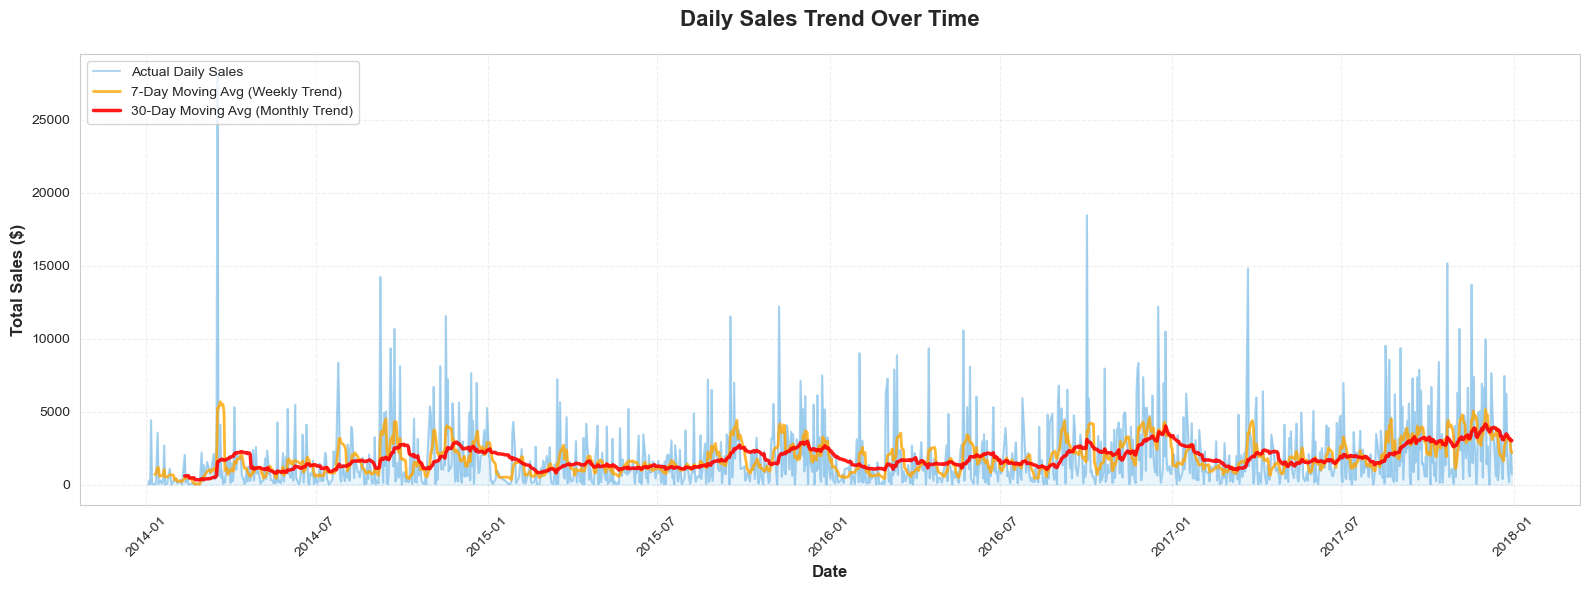

In [8]:
# --- Visualize Daily Sales Trend ---
plt.figure(figsize=(16, 6))

# 1. Plot raw daily data
plt.plot(daily_sales['Date'], daily_sales['Total_Sales'], 
         color='#3498db', linewidth=1.5, alpha=0.4, label='Actual Daily Sales')

# 2. Fill the area under the curve
plt.fill_between(daily_sales['Date'], daily_sales['Total_Sales'], 
                 alpha=0.1, color='#3498db')

# 3. Add moving averages to smooth the trend
daily_sales['MA_7'] = daily_sales['Total_Sales'].rolling(window=7).mean()
daily_sales['MA_30'] = daily_sales['Total_Sales'].rolling(window=30).mean()

plt.plot(daily_sales['Date'], daily_sales['MA_7'], 
         color='orange', linewidth=2, label='7-Day Moving Avg (Weekly Trend)', alpha=0.8)
plt.plot(daily_sales['Date'], daily_sales['MA_30'], 
         color='red', linewidth=2.5, label='30-Day Moving Avg (Monthly Trend)', alpha=0.9)

# 4. Formatting the chart
plt.title('Daily Sales Trend Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=10, frameon=True)

# 5. Save and Show
plt.tight_layout()
plt.savefig('daily_sales_trend.png', dpi=300, bbox_inches='tight')
print(" Daily sales trend plot generated and saved as 'daily_sales_trend.png'!")
plt.show()

 Monthly sales analysis saved as 'monthly_sales_analysis.png'!


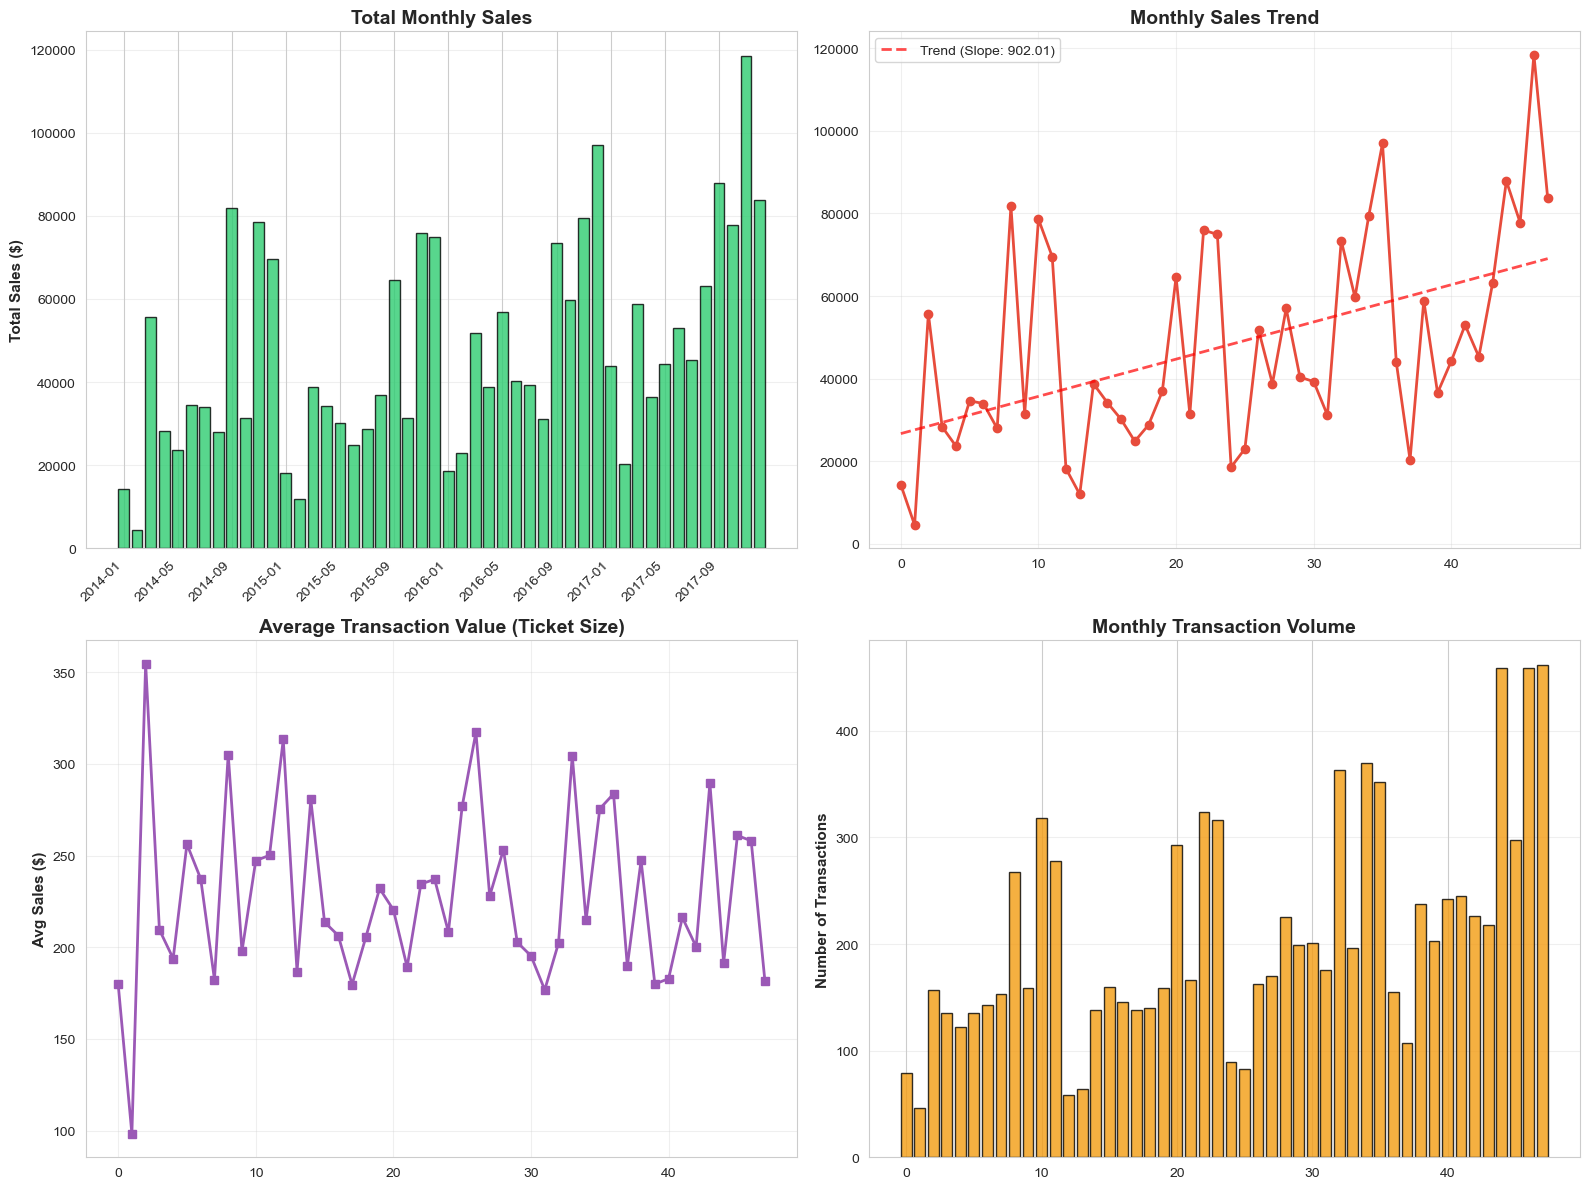


 MONTHLY SALES SUMMARY:
    Best Month:  2017-11 ($118,447.82)
    Worst Month: 2014-02 ($4,519.89)
    Average Monthly Sales: $47,858.35


In [9]:
# Aggregate by year and month for better visualization
df['Year_Month'] = df[date_column].dt.to_period('M')
monthly_agg = df.groupby('Year_Month').agg({
    sales_column: ['sum', 'mean', 'count']
}).reset_index()

# Flatten the multi-index columns
monthly_agg.columns = ['Year_Month', 'Total_Sales', 'Avg_Sales', 'Transactions']
monthly_agg['Year_Month_Str'] = monthly_agg['Year_Month'].astype(str)

# Visualize monthly sales using a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Plot 1: Monthly Sales Bar Chart ---
axes[0, 0].bar(range(len(monthly_agg)), monthly_agg['Total_Sales'], 
              color='#2ecc71', edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Total Monthly Sales', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11, fontweight='bold')
# Setting ticks to avoid overcrowding
step = max(1, len(monthly_agg)//12)
axes[0, 0].set_xticks(range(0, len(monthly_agg), step))
axes[0, 0].set_xticklabels(monthly_agg['Year_Month_Str'][::step], rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# --- Plot 2: Monthly Sales Line Chart with Linear Trend ---
axes[0, 1].plot(range(len(monthly_agg)), monthly_agg['Total_Sales'], 
               marker='o', linewidth=2, markersize=6, color='#e74c3c')
axes[0, 1].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
# Add linear trend line using numpy polyfit
z = np.polyfit(range(len(monthly_agg)), monthly_agg['Total_Sales'], 1)
p = np.poly1d(z)
axes[0, 1].plot(range(len(monthly_agg)), p(range(len(monthly_agg))), 
               "r--", linewidth=2, label=f'Trend (Slope: {z[0]:.2f})', alpha=0.7)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# --- Plot 3: Average Transaction Value ---
axes[1, 0].plot(range(len(monthly_agg)), monthly_agg['Avg_Sales'], 
               marker='s', linewidth=2, markersize=6, color='#9b59b6')
axes[1, 0].set_title('Average Transaction Value (Ticket Size)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Avg Sales ($)', fontsize=11, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# --- Plot 4: Number of Transactions ---
axes[1, 1].bar(range(len(monthly_agg)), monthly_agg['Transactions'], 
              color='#f39c12', edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Monthly Transaction Volume', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Transactions', fontsize=11, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('monthly_sales_analysis.png', dpi=300, bbox_inches='tight')
print(" Monthly sales analysis saved as 'monthly_sales_analysis.png'!")
plt.show()

# --- Print Summary ---
print("\n MONTHLY SALES SUMMARY:")
best_idx = monthly_agg['Total_Sales'].idxmax()
worst_idx = monthly_agg['Total_Sales'].idxmin()

print(f"    Best Month:  {monthly_agg.loc[best_idx, 'Year_Month_Str']} (${monthly_agg['Total_Sales'].max():,.2f})")
print(f"    Worst Month: {monthly_agg.loc[worst_idx, 'Year_Month_Str']} (${monthly_agg['Total_Sales'].min():,.2f})")
print(f"    Average Monthly Sales: ${monthly_agg['Total_Sales'].mean():,.2f}")

 SEASONAL ANALYSIS

 Sales by Month (All Years Combined):

 Sales by Quarter:
                 sum        mean  count
Quarter                                
1        359681.5758  261.206664   1377
2        445509.6196  210.146047   2120
3        613932.1057  219.339802   2799
4        878077.5592  237.446609   3698

 Sales by Day of Week:
                     sum        mean  count
Day_of_Week                                
Monday       428937.8157  229.255914   1871
Tuesday      287209.5022  259.683094   1106
Wednesday     88056.9752  237.350337    371
Thursday     321965.7785  220.072302   1463
Friday       427692.2593  235.254268   1818
Saturday     357984.6830  216.304944   1655
Sunday       385353.8464  225.353127   1710

 Seasonal patterns visualization saved as 'seasonal_patterns.png'!


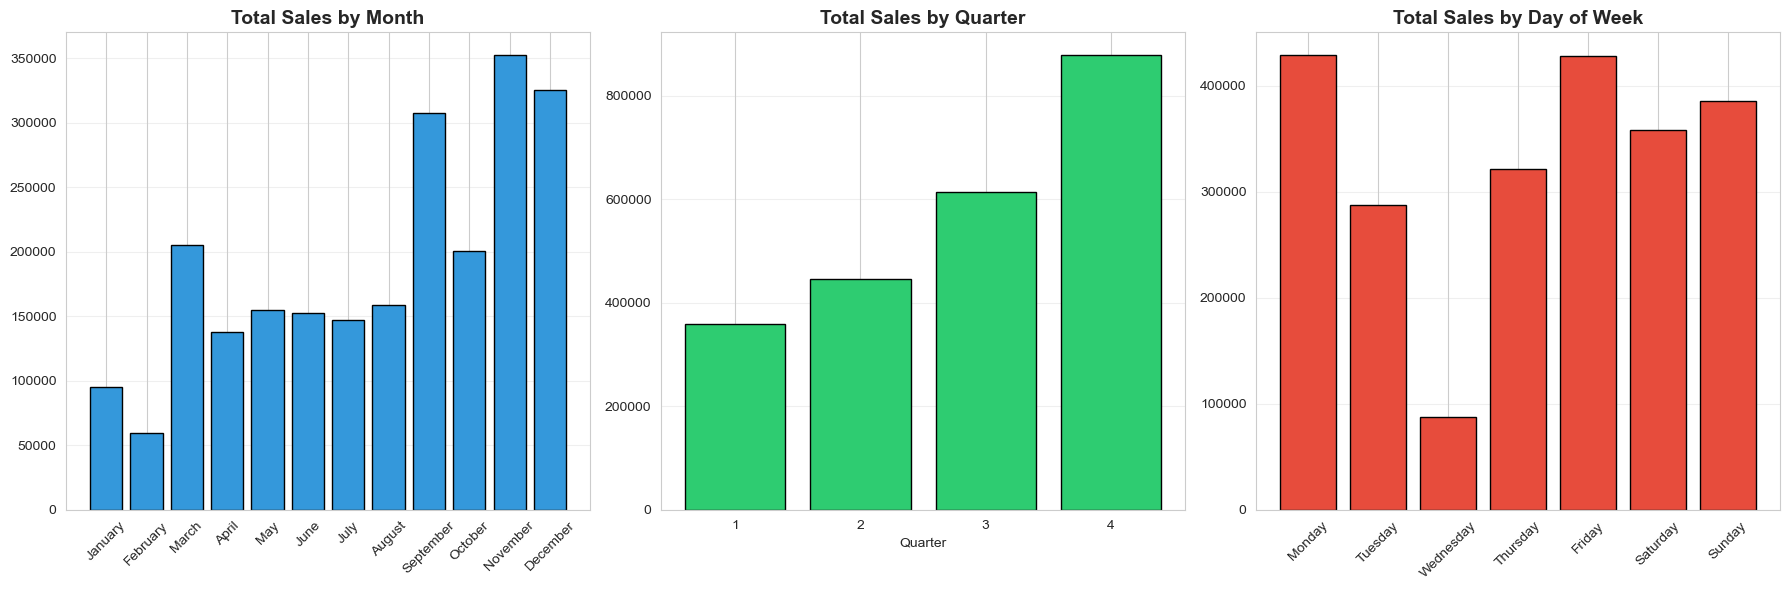


 PEAK PERIODS SUMMARY:
    Highest Revenue Month:   November
    Highest Revenue Quarter: Q4
    Strongest Sales Day:     Monday


In [10]:
# Seasonal patterns
print(" SEASONAL ANALYSIS")


# 1. Sales by month (across all years)
sales_by_month = df.groupby('Month_Name')[sales_column].agg(['sum', 'mean', 'count'])
# Ensuring correct chronological order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex(month_order)

print("\n Sales by Month (All Years Combined):")
print(sales_by_month.style.format("${:,.2f}", subset=['sum', 'mean']) if hasattr(sales_by_month, 'style') else sales_by_month)

# 2. Sales by quarter
sales_by_quarter = df.groupby('Quarter')[sales_column].agg(['sum', 'mean', 'count'])
print("\n Sales by Quarter:")
print(sales_by_quarter)

# 3. Sales by day of week
sales_by_day = df.groupby('Day_of_Week')[sales_column].agg(['sum', 'mean', 'count'])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(day_order)

print("\n Sales by Day of Week:")
print(sales_by_day)

# --- Visualize seasonal patterns ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Monthly Seasonality
axes[0].bar(sales_by_month.index, sales_by_month['sum'], color='#3498db', edgecolor='black')
axes[0].set_title('Total Sales by Month', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Quarterly Performance
# Convert index to string to avoid numeric labels on x-axis
axes[1].bar(sales_by_quarter.index.astype(str), sales_by_quarter['sum'], color='#2ecc71', edgecolor='black')
axes[1].set_title('Total Sales by Quarter', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Quarter')
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Day of Week Strength
axes[2].bar(sales_by_day.index, sales_by_day['sum'], color='#e74c3c', edgecolor='black')
axes[2].set_title('Total Sales by Day of Week', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('seasonal_patterns.png', dpi=300, bbox_inches='tight')
print("\n Seasonal patterns visualization saved as 'seasonal_patterns.png'!")
plt.show()

# --- Identify peak season ---
best_month = sales_by_month['sum'].idxmax()
best_quarter = sales_by_quarter['sum'].idxmax()
best_day = sales_by_day['sum'].idxmax()

print(f"\n PEAK PERIODS SUMMARY:")
print(f"    Highest Revenue Month:   {best_month}")
print(f"    Highest Revenue Quarter: Q{best_quarter}")
print(f"    Strongest Sales Day:     {best_day}")

 YEAR-OVER-YEAR ANALYSIS
   Year  Total_Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552

 Year-over-Year Growth Rate:
 Year  YoY_Growth
 2015   -2.832227
 2016   29.471521
 2017   20.355962

 Yearly analysis visualization saved as 'yearly_analysis.png'!


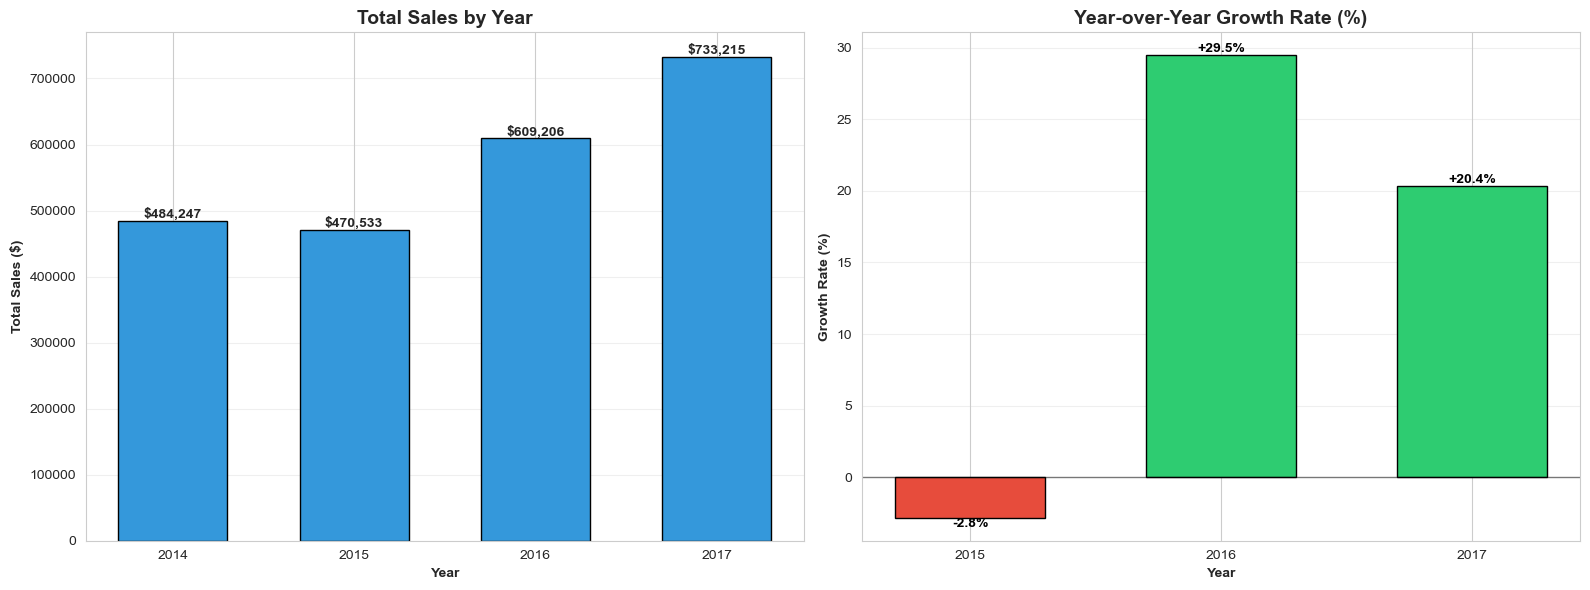

In [11]:
# --- Year-over-Year (YoY) Analysis ---
yearly_sales = df.groupby('Year')[sales_column].sum().reset_index()
yearly_sales.columns = ['Year', 'Total_Sales']

print(" YEAR-OVER-YEAR ANALYSIS")

print(yearly_sales)

# Calculate YoY growth percentage
if len(yearly_sales) > 1:
    yearly_sales['YoY_Growth'] = yearly_sales['Total_Sales'].pct_change() * 100
    print("\n Year-over-Year Growth Rate:")
    # Display only years that have a growth calculation
    print(yearly_sales[['Year', 'YoY_Growth']].dropna().to_string(index=False))

# --- Visualize Yearly Performance ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total Yearly Sales (Absolute Volume)
axes[0].bar(yearly_sales['Year'].astype(str), yearly_sales['Total_Sales'], 
          color='#3498db', edgecolor='black', width=0.6)
axes[0].set_title('Total Sales by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Total Sales ($)', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, row in yearly_sales.iterrows():
    axes[0].text(i, row['Total_Sales'], f'${row["Total_Sales"]:,.0f}', 
               ha='center', va='bottom', fontweight='bold', fontsize=10)

# Plot 2: YoY Growth Rate (Percentage Change)
if len(yearly_sales) > 1:
    growth_data = yearly_sales.dropna(subset=['YoY_Growth']).reset_index()
    # Green for positive growth, Red for negative
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in growth_data['YoY_Growth']]
    
    axes[1].bar(growth_data['Year'].astype(str), growth_data['YoY_Growth'], 
              color=colors, edgecolor='black', width=0.6)
    axes[1].set_title('Year-over-Year Growth Rate (%)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Year', fontweight='bold')
    axes[1].set_ylabel('Growth Rate (%)', fontweight='bold')
    axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add percentage labels
    for i, row in growth_data.iterrows():
        axes[1].text(i, row['YoY_Growth'], f'{row["YoY_Growth"]:+.1f}%', 
                   ha='center', va='bottom' if row['YoY_Growth'] > 0 else 'top', 
                   fontweight='bold', color='black')
else:
    axes[1].text(0.5, 0.5, 'Need at least 2 years of data\nfor YoY Growth', 
                ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.savefig('yearly_analysis.png', dpi=300, bbox_inches='tight')
print("\n Yearly analysis visualization saved as 'yearly_analysis.png'!")
plt.show()

In [12]:
# --- Save Cleaned Data ---
df.to_csv('sales_data_processed.csv', index=False)
print(" Processed data saved to your local folder!")

# --- Save Aggregated Time Series ---
daily_sales.to_csv('daily_sales_timeseries.csv', index=False)
print(" Daily time series saved to your local folder!")

# --- Verification of Saved Images ---
import os

images = [
    'daily_sales_trend.png',
    'monthly_sales_analysis.png',
    'seasonal_patterns.png',
    'yearly_analysis.png'
]

print("\n Checking Saved Visualizations:")
for img in images:
    if os.path.exists(img):
        print(f" Found and Verified: {img}")
    else:
        print(f" Warning: {img} was not found in the directory.")

# --- Final Success Message ---

print(" ANALYSIS COMPLETE!")
print(" All files are saved in your current directory.")
print(" Ready for Forecasting!")


 Processed data saved to your local folder!
 Daily time series saved to your local folder!

 Checking Saved Visualizations:
 Found and Verified: daily_sales_trend.png
 Found and Verified: monthly_sales_analysis.png
 Found and Verified: seasonal_patterns.png
 Found and Verified: yearly_analysis.png
 ANALYSIS COMPLETE!
 All files are saved in your current directory.
 Ready for Forecasting!
